# Decision-Tree-Income-Prediction

In this project, i have build a decision tree to predict the income of a given population, which is labelled as <= 50𝐾𝑎𝑛𝑑> 50K. The attributes (predictors) are age, working class type, marital status, gender, race etc.

In the following sections, we'll:

clean and prepare the data,
build a decision tree with default hyperparameters,
understand all the hyperparameters that we can tune, and finally
choose the optimal hyperparameters using grid search cross-validation.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
%matplotlib inline

In [2]:
df = pd.read_csv('adult_dataset.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.apply(lambda x:x == '?',axis=0).sum()

C:\Users\vikra\anaconda3\envs\techlov\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
len(df[df['workclass'] == '?'].index)/len(df.index)

0.05638647461687295

In [8]:
len(df[df['occupation'] == '?'].index)/len(df.index)

0.056601455729246644

In [9]:
len(df[df['native.country'] == '?'].index)/len(df.index)

0.0179048555019809

In [10]:
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.apply(lambda x:x == '?',axis=0).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df_categorical = df[[col for col in df.columns if df[col].dtypes == 'object']]

In [15]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [16]:
le = LabelEncoder()

In [17]:
df_categorical = df_categorical.apply(le.fit_transform)

In [18]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [19]:
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int32
 7   education       30162 non-null  int32
 8   marital.status  30162 non-null  int32
 9   occupation      30162 non-null  int32
 10  relationship    30162 non-null  int32
 11  race            30162 non-null  int32
 12  sex             30162 non-null  int32
 13  native.country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [21]:
df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [22]:
df['income'] = df['income'].astype('category')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('income',axis=1)
y = df['income']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [26]:
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
18546,49,268234,6,0,0,40,2,0,2,3,0,4,1,38
19924,22,233624,9,0,0,43,2,11,2,2,0,4,1,38
2770,42,184837,9,7298,0,40,2,11,2,6,5,4,0,38
2899,55,227856,13,7298,0,60,2,9,2,3,0,4,1,38
10655,36,128382,10,0,0,45,2,15,4,6,4,4,1,38


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6774
           1       0.77      0.51      0.61      2275

    accuracy                           0.84      9049
   macro avg       0.81      0.73      0.75      9049
weighted avg       0.83      0.84      0.83      9049



In [31]:
print(confusion_matrix(y_test,y_pred_default))

[[6438  336]
 [1126 1149]]


In [33]:
df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [34]:
print(accuracy_score(y_test,y_pred_default))

0.8384351862084208


In [37]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [51]:
features = list(df.columns[:-1])

In [52]:
features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [41]:
# import os
# os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [43]:
# dot_data = StringIO()  
# export_graphviz(dt_default, out_file=dot_data,
#                 feature_names=features, filled=True,rounded=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

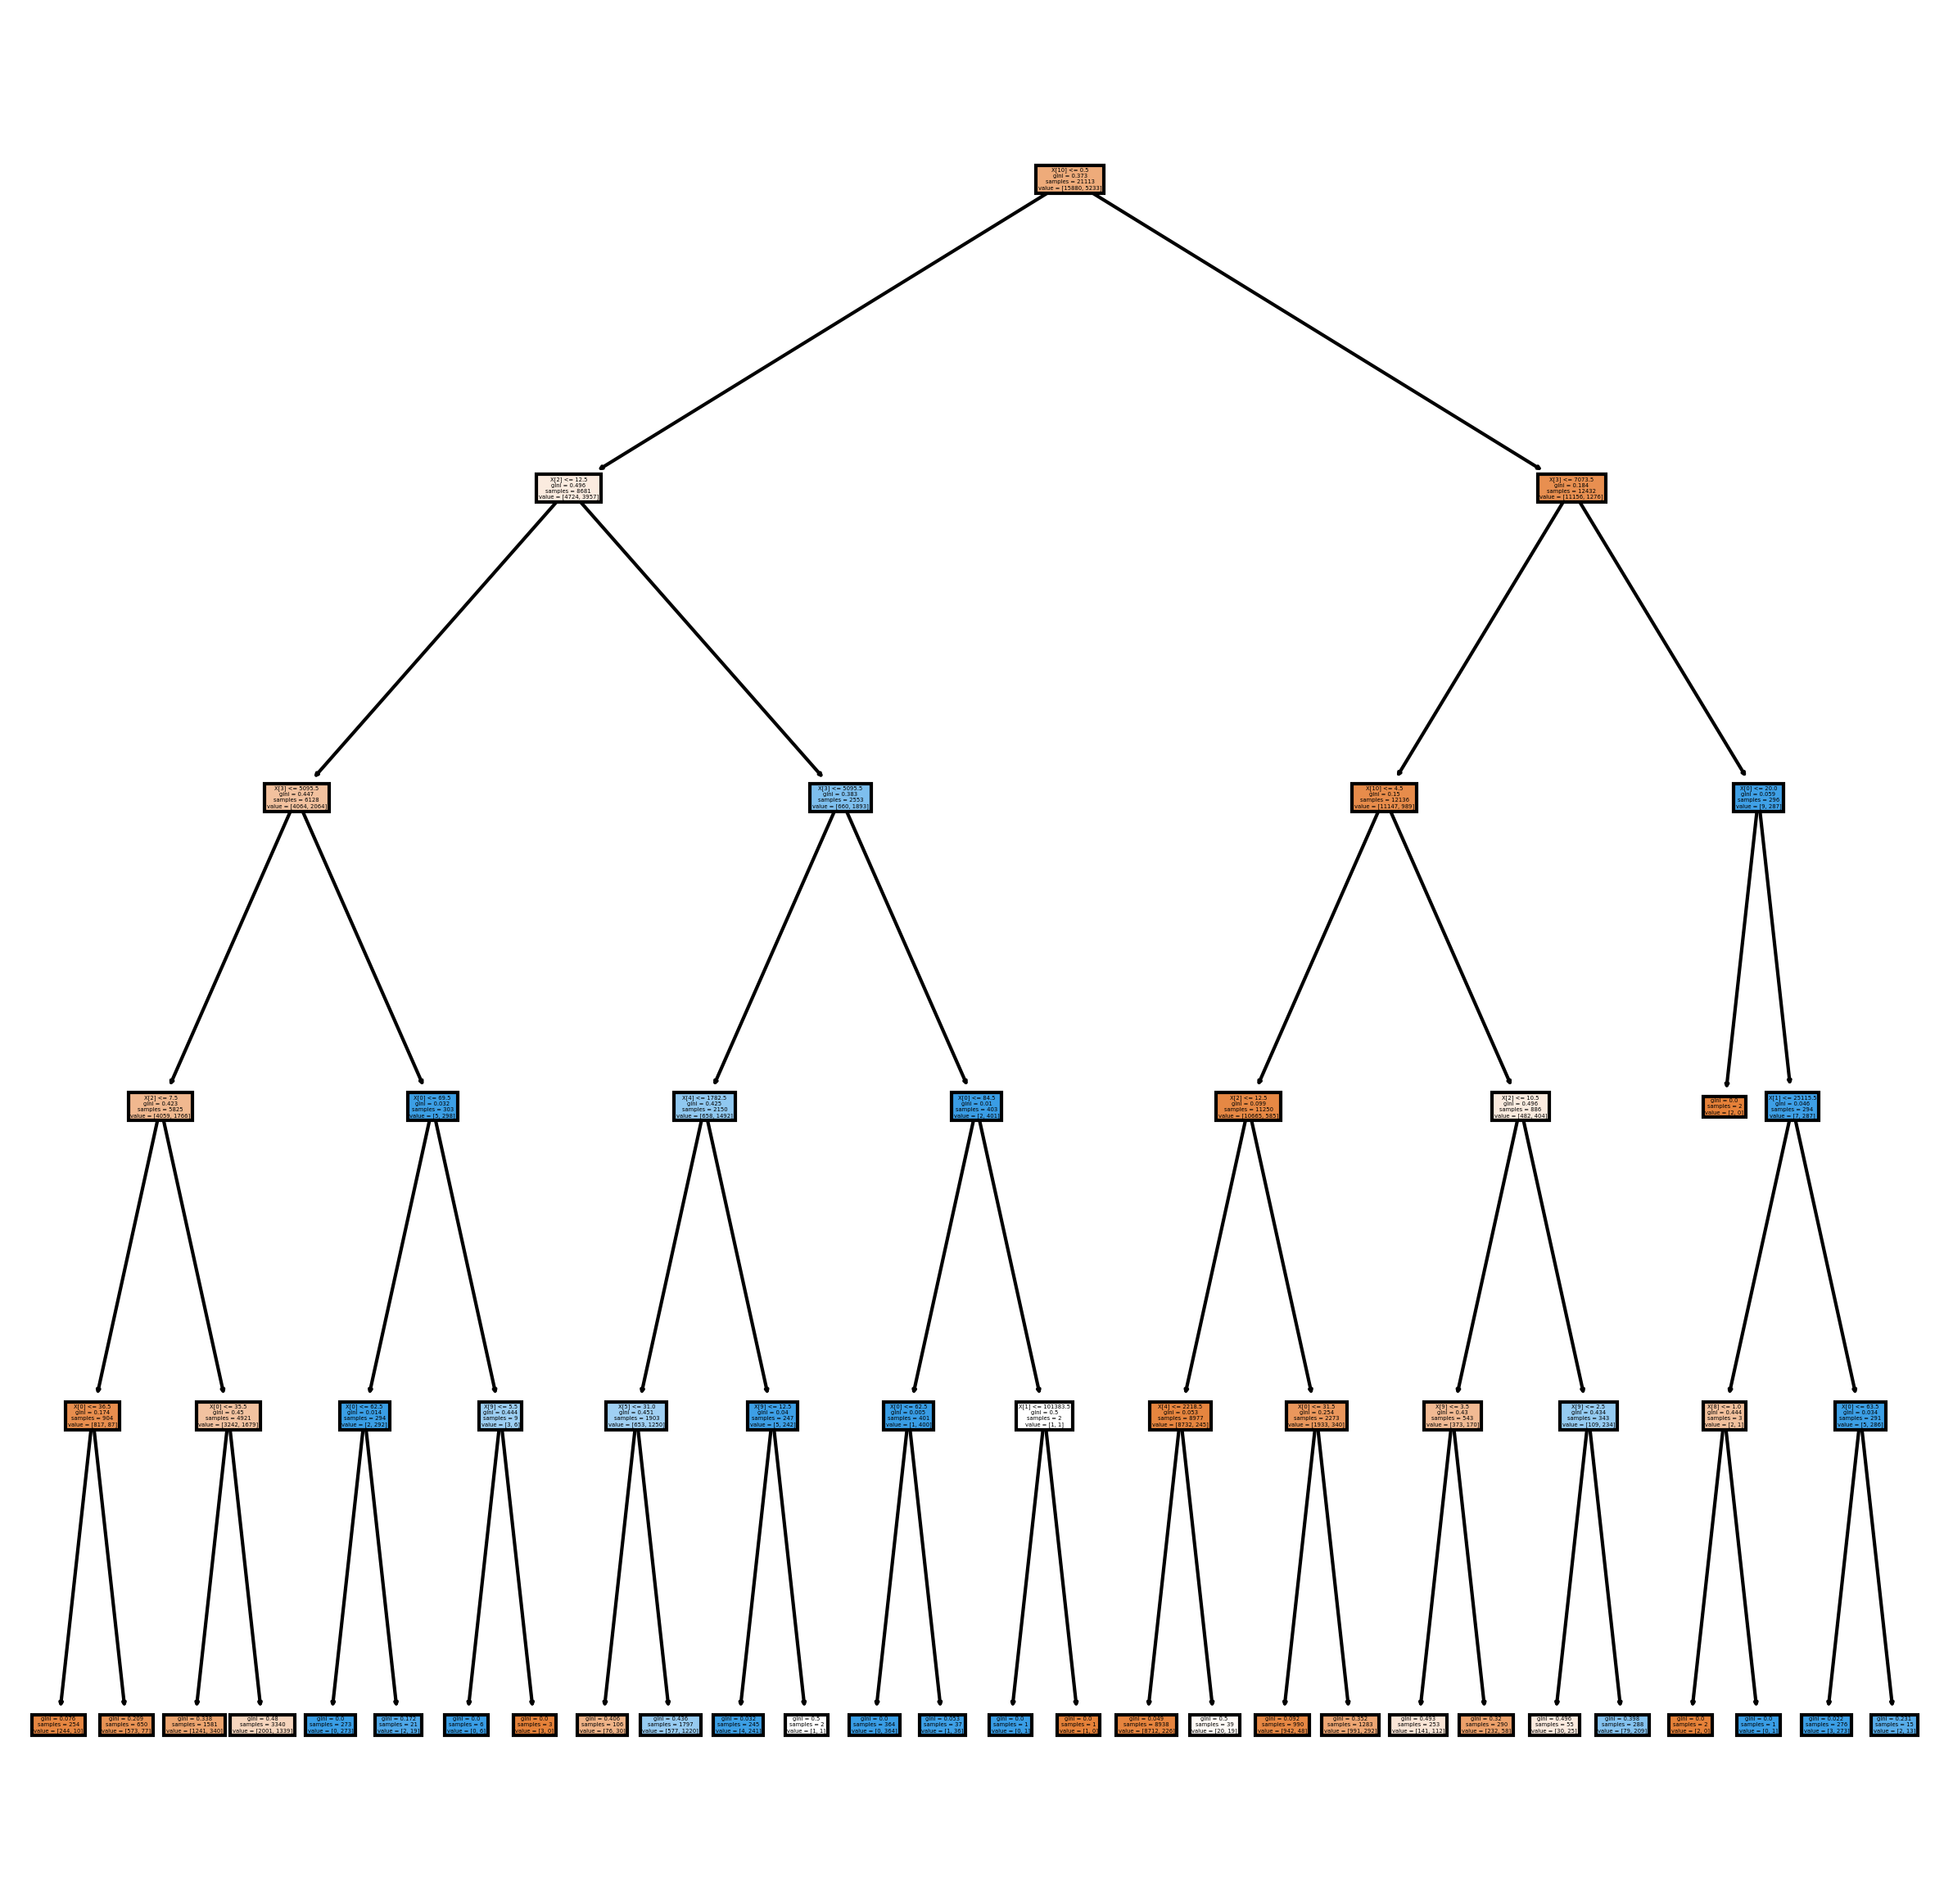

In [97]:
features = list(df.columns[:-1])
cn = list(df.columns[-1:])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dt_default,filled=True)
fig.savefig('imagname.png')


In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [101]:
n_folds = 5
parameters = {'max_depth':range(1,40)}
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)
tree = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [102]:
scores = tree.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010373,0.000478,0.001790,0.000752,1,{'max_depth': 1},0.752072,0.752072,0.752072,0.752250,...,0.752143,0.000087,39,0.752161,0.752161,0.752161,0.752117,0.752117,0.752143,0.000022
1,0.013370,0.000495,0.001990,0.000011,2,{'max_depth': 2},0.820507,0.825006,0.823585,0.824017,...,0.823711,0.001734,15,0.824512,0.823387,0.823742,0.823634,0.823279,0.823711,0.000434
2,0.017157,0.000397,0.001994,0.000008,3,{'max_depth': 3},0.833767,0.837319,0.838740,0.838702,...,0.837541,0.001987,11,0.838662,0.837774,0.837419,0.837369,0.837191,0.837683,0.000525
3,0.020937,0.000013,0.002000,0.000011,4,{'max_depth': 4},0.836846,0.844897,0.843950,0.847466,...,0.843509,0.003548,8,0.845352,0.843280,0.843576,0.842697,0.843467,0.843675,0.000892
4,0.024734,0.000399,0.002194,0.000399,5,{'max_depth': 5},0.839924,0.847739,0.842766,0.848650,...,0.844930,0.003221,7,0.847543,0.845471,0.847069,0.845361,0.845953,0.846280,0.000874
5,0.028921,0.001096,0.001997,0.000010,6,{'max_depth': 6},0.844187,0.849633,0.847739,0.851729,...,0.848435,0.002491,3,0.854825,0.852043,0.853049,0.850986,0.853413,0.852863,0.001295
6,0.032113,0.000400,0.001999,0.000009,7,{'max_depth': 7},0.844660,0.852475,0.850107,0.851492,...,0.849761,0.002705,1,0.859384,0.856424,0.858911,0.856373,0.857735,0.857765,0.001239
7,0.035698,0.000396,0.002000,0.000007,8,{'max_depth': 8},0.845134,0.851291,0.846791,0.854334,...,0.849003,0.003343,2,0.862285,0.859917,0.862108,0.859925,0.860991,0.861045,0.001019
8,0.038300,0.000486,0.002388,0.000494,9,{'max_depth': 9},0.843476,0.844660,0.845371,0.847939,...,0.846019,0.001967,5,0.865838,0.864121,0.867436,0.863892,0.865490,0.865355,0.001284
9,0.041688,0.000419,0.002191,0.000401,10,{'max_depth': 10},0.843713,0.841819,0.850580,0.849597,...,0.846303,0.003353,4,0.873475,0.870752,0.873416,0.871648,0.870641,0.871986,0.001242


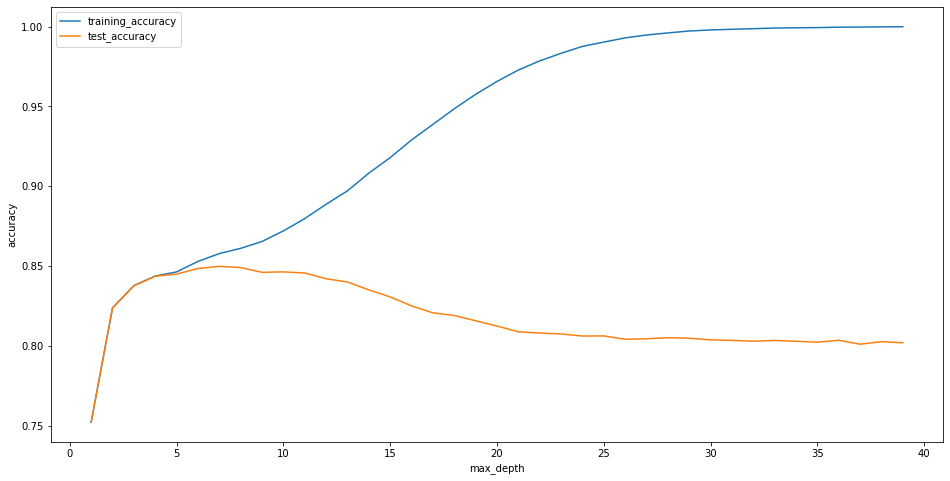

In [103]:
plt.figure(figsize=(16,8))
plt.plot(scores['param_max_depth'],scores['mean_train_score'],label='training_accuracy')
plt.plot(scores['param_max_depth'],scores['mean_test_score'],label='test_accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds=5

parameters = {'min_samples_leaf':range(5,200,20)}

dtree = DecisionTreeClassifier(criterion='gini',random_state=100)

tree = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [110]:
scores = tree.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057047,0.002394,0.002594,4.886361e-04,5,{'min_samples_leaf': 5},0.818376,0.822875,0.820033,0.836097,...,0.826553,0.007642,10,0.914328,0.913914,0.915867,0.913445,0.915458,0.914602,0.000919
1,0.047074,0.000746,0.002594,4.886166e-04,25,{'min_samples_leaf': 25},0.847265,0.840871,0.846791,0.851729,...,0.846161,0.003596,6,0.871758,0.871107,0.870160,0.868214,0.869694,0.870187,0.001221
2,0.043882,0.000631,0.001995,1.907349e-07,45,{'min_samples_leaf': 45},0.843476,0.847028,0.847739,0.852440,...,0.848009,0.002934,5,0.863233,0.866134,0.862049,0.859985,0.861879,0.862656,0.002027
3,0.040890,0.001093,0.002594,4.885971e-04,65,{'min_samples_leaf': 65},0.843239,0.848686,0.847265,0.852440,...,0.848956,0.003615,2,0.859207,0.858555,0.859503,0.858623,0.857498,0.858677,0.000688
4,0.041090,0.001466,0.002394,4.886166e-04,85,{'min_samples_leaf': 85},0.845371,0.846555,0.848449,0.853387,...,0.848672,0.002776,3,0.857371,0.856424,0.856779,0.855840,0.855959,0.856475,0.000560
5,0.038696,0.000746,0.002394,4.885582e-04,105,{'min_samples_leaf': 105},0.847028,0.845134,0.851527,0.852913,...,0.849477,0.002918,1,0.856069,0.855477,0.855299,0.854775,0.854005,0.855125,0.000696
6,0.037699,0.000746,0.002593,4.885971e-04,125,{'min_samples_leaf': 125},0.846791,0.845844,0.849870,0.850308,...,0.848672,0.001957,4,0.855832,0.854707,0.852516,0.853472,0.853295,0.853964,0.001168
7,0.036502,0.001017,0.002394,4.886555e-04,145,{'min_samples_leaf': 145},0.839214,0.840635,0.847265,0.846518,...,0.845120,0.004657,8,0.851806,0.852279,0.850030,0.849920,0.850749,0.850957,0.000943
8,0.037100,0.002631,0.002594,4.887724e-04,165,{'min_samples_leaf': 165},0.840871,0.839687,0.846555,0.846992,...,0.845167,0.004400,7,0.850444,0.852279,0.848313,0.848736,0.850631,0.850081,0.001429
9,0.035106,0.000746,0.001995,1.907349e-07,185,{'min_samples_leaf': 185},0.840635,0.836609,0.846555,0.849834,...,0.844220,0.004864,9,0.850503,0.849319,0.847010,0.846960,0.846427,0.848044,0.001583


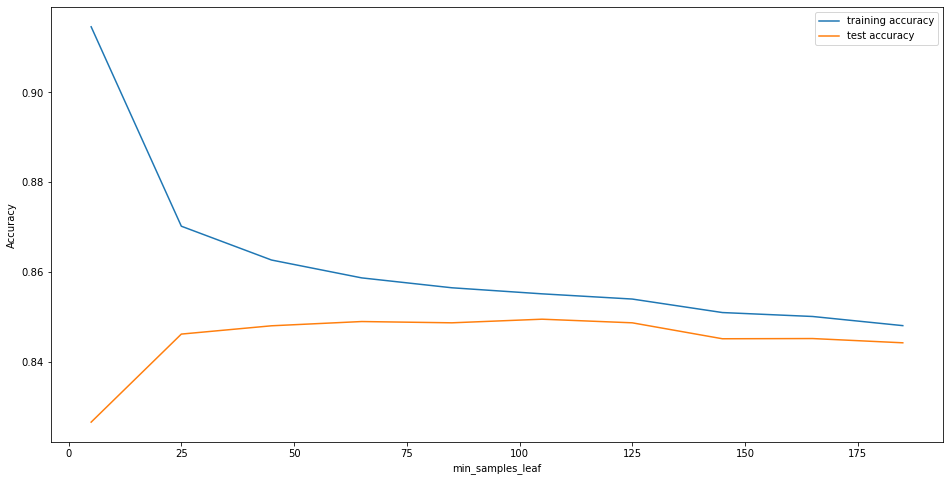

In [113]:
plt.figure(figsize=(16,8))
\
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [119]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [120]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061634,0.001465,0.002594,0.000489,5,{'min_samples_split': 5},0.806062,0.803220,0.805115,0.815727,...,0.808744,0.004963,10,0.971699,0.970634,0.969745,0.970635,0.968504,0.970243,0.001068
1,0.056449,0.000489,0.002793,0.000399,25,{'min_samples_split': 25},0.826427,0.826900,0.828795,0.832781,...,0.829300,0.002516,9,0.908467,0.908467,0.907460,0.910307,0.908709,0.908682,0.000920
2,0.055451,0.001017,0.002394,0.000489,45,{'min_samples_split': 45},0.835662,0.827848,0.841345,0.837755,...,0.836357,0.004641,8,0.891001,0.891119,0.890290,0.892428,0.890060,0.890979,0.000829
3,0.055254,0.001740,0.002591,0.000492,65,{'min_samples_split': 65},0.839451,0.836846,0.844660,0.843439,...,0.841283,0.002816,7,0.882948,0.884073,0.882771,0.883133,0.881416,0.882868,0.000854
4,0.053650,0.001162,0.001993,0.000004,85,{'min_samples_split': 85},0.840871,0.838740,0.843713,0.847229,...,0.843225,0.003080,6,0.879988,0.878863,0.878271,0.879226,0.876621,0.878594,0.001133


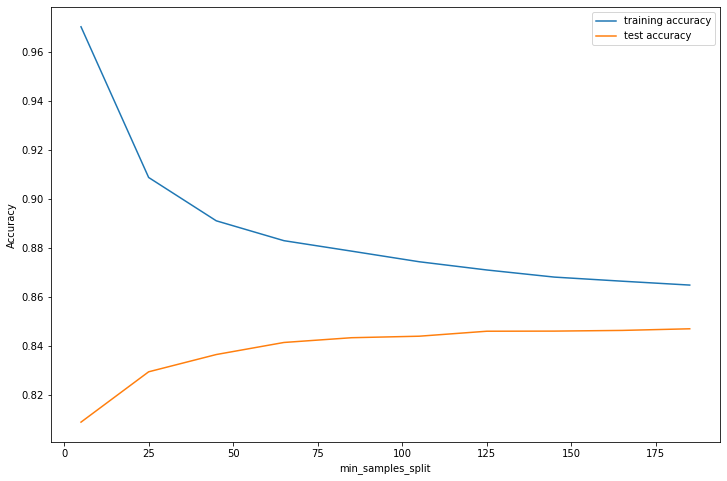

In [121]:
plt.figure(figsize=(12,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [122]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, verbose=1)

In [123]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029521,0.001353,0.002195,3.987313e-04,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.840398,...,0.845640,0.002926,9,0.847010,0.845234,0.845885,0.844888,0.845480,0.845699,0.000732
1,0.029122,0.000399,0.002394,4.886555e-04,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.840398,...,0.845640,0.002926,9,0.847010,0.845234,0.845885,0.844888,0.845480,0.845699,0.000732
2,0.028723,0.000399,0.002194,3.990889e-04,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.839214,...,0.845119,0.003135,11,0.846596,0.844760,0.845115,0.844296,0.844829,0.845119,0.000784
3,0.028324,0.000489,0.001995,2.431402e-07,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.839214,...,0.845119,0.003135,11,0.846596,0.844760,0.845115,0.844296,0.844829,0.845119,0.000784
4,0.044880,0.000631,0.002195,3.989935e-04,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.838977,...,0.846967,0.004955,5,0.856187,0.856424,0.854589,0.854360,0.853591,0.855030,0.001095
5,0.046276,0.001493,0.002593,4.885387e-04,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.837793,...,0.846730,0.005344,6,0.856187,0.856424,0.854589,0.854360,0.853591,0.855030,0.001095
6,0.043483,0.000489,0.002394,4.886166e-04,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.846081,...,0.849003,0.002591,3,0.852575,0.853641,0.851273,0.851400,0.851755,0.852129,0.000882
7,0.043483,0.000798,0.002195,3.988982e-04,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.846081,...,0.849003,0.002591,3,0.852575,0.853641,0.851273,0.851400,0.851755,0.852129,0.000882
8,0.024733,0.000399,0.002194,3.989935e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.840398,...,0.845119,0.002729,11,0.847010,0.845234,0.845885,0.844888,0.845717,0.845747,0.000723
9,0.025531,0.000798,0.002394,4.885971e-04,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.840398,...,0.845119,0.002729,11,0.847010,0.845234,0.845885,0.844888,0.845717,0.845747,0.000723


In [124]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.849145377331262
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [125]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [126]:
clf_gini.score(X_test,y_test)

0.8447342247762184

In [127]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8319151287435076


In [128]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6774
           1       0.76      0.48      0.59      2275

    accuracy                           0.83      9049
   macro avg       0.80      0.71      0.74      9049
weighted avg       0.82      0.83      0.82      9049



In [129]:
print(confusion_matrix(y_test,y_pred))

[[6437  337]
 [1184 1091]]
